In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas

file_path = "universal_top_spotify_songs.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "asaniczka/top-spotify-songs-in-73-countries-daily-updated",
  file_path,
)

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Arthur\AppData\Local\Temp\ipykernel_992\131758281.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 432M/432M [00:41<00:00, 10.9MB/s] 


# Quais são as instâncias?

In [ ]:
df

# Features

In [3]:
for feature in (df.columns.tolist()):
    print(feature)

spotify_id
name
artists
daily_rank
daily_movement
weekly_movement
country
snapshot_date
popularity
is_explicit
duration_ms
album_name
album_release_date
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
time_signature


# Class Ratio

In [8]:
for col in df.select_dtypes(exclude='number').columns:
    print(f'-----------------------------')
    print(df[col].value_counts())


-----------------------------
spotify_id
6dOtVTDdiauQNBQEDOtlAB    14630
2plbrEY59IikOBgBGLjaoe    12096
17phhZDn6oGtzMe56NuWvj    11201
3xkHsmpQCBMytMJNiDf3Ii     9703
7bywjHOc0wSjGGbj04XbVi     8522
                          ...  
6hrH0mb1qQsd4VRxssKa6p        1
0oEggQXxzb1U5oCTUQK1GB        1
6b56cSwwp8JXDQiZ4dXkBf        1
3uWDhz3cIoWzN1944cUmq6        1
4dkAVeT8SCueEWoKK3Q2R0        1
Name: count, Length: 22394, dtype: int64
-----------------------------
name
BIRDS OF A FEATHER    14630
Die With A Smile      13903
Espresso              12663
Beautiful Things      12519
Lose Control          11201
                      ...  
Suicide                   1
trenger min love          1
Te văd în trecut          1
Me Usa                    1
Idiota                    1
Name: count, Length: 19618, dtype: int64
-----------------------------
artists
Billie Eilish                    29665
Sabrina Carpenter                27752
Bad Bunny                        25200
KAROL G                    

# 20 Análises Univariativas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Variação de Músicas que mais variaram em relação ao dia anterior
plt.figure(figsize=(12, 6))
plt.hist(df['daily_movement'], bins=range(df['daily_movement'].min(), df['daily_movement'].max() + 1),
         color='skyblue', edgecolor='black', align='left')

plt.title('Frequência de Variações Diárias no Ranking')
plt.xlabel('Variação no Ranking (daily_movement)')
plt.ylabel('Número de Músicas')

plt.grid(True)
plt.tight_layout()
plt.show()

# Contar quantas músicas têm cada valor de variação (diária)
contagem_variacoes = df['daily_movement'].value_counts().sort_index()

# Printar de forma organizada
print("Variação no Ranking | Quantidade de Músicas")
for variacao, qtd in contagem_variacoes.items():
    print(f"{variacao} | {qtd}")

In [ ]:
# Variação de Músicas que mais variaram em relação a semana anterior
plt.figure(figsize=(12, 6))
plt.hist(df['weekly_movement'], bins=range(df['weekly_movement'].min(), df['weekly_movement'].max() + 1), 
         color='skyblue', edgecolor='black', align='left')

plt.title('Frequência de Variações Diárias no Ranking')
plt.xlabel('Variação no Ranking (weekly_movement)')
plt.ylabel('Número de Músicas')

plt.grid(True)
plt.tight_layout()
plt.show()

# Contar quantas músicas têm cada valor de variação (semanal)
contagem_variacoes = df['weekly_movement'].value_counts().sort_index()

# Printar de forma organizada
print("Variação no Ranking | Quantidade de Músicas")
for variacao, qtd in contagem_variacoes.items():
    print(f"{variacao} | {qtd}")


In [ ]:
# Dados dos 25 países com mais músicas
top_countries = df['country'].value_counts(dropna=True).head(25)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')

plt.yscale('log')  # Escala logarítmica

plt.title('Top 25 Países com Mais Músicas no Top 50 (Escala Log)', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Músicas (log)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Países com mais músicas.
print("\n Países com mais músicas:")
print(df['country'].value_counts(dropna=True).head(25))

In [ ]:
# Distribuição de músicas com e sem vocais.
print("\n Distribuição de músicas com e sem vocais:")
df['vocals'] = df['instrumentalness'].apply(lambda x: 'Instrumental' if x > 0.5 else 'Com vocais')
print(df['vocals'].value_counts())

# Contando quantas músicas em cada categoria
vocals_count = df['vocals'].value_counts()

# Criando o gráfico
plt.figure(figsize=(6, 5))
vocals_count.plot(kind='bar', color=['mediumseagreen', 'mediumpurple'], edgecolor='black')

# Títulos e rótulos
plt.title('Distribuição de Músicas com e sem Vocais', fontsize=14)
plt.xlabel('Tipo de Música', fontsize=12)
plt.ylabel('Número de Músicas', fontsize=12)
plt.xticks(rotation=0)

# Adiciona os valores nas barras
for i, value in enumerate(vocals_count):
    plt.text(i, value + value * 0.01, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\Arthur\AppData\Local\Temp\ipykernel_14160\62456341.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")


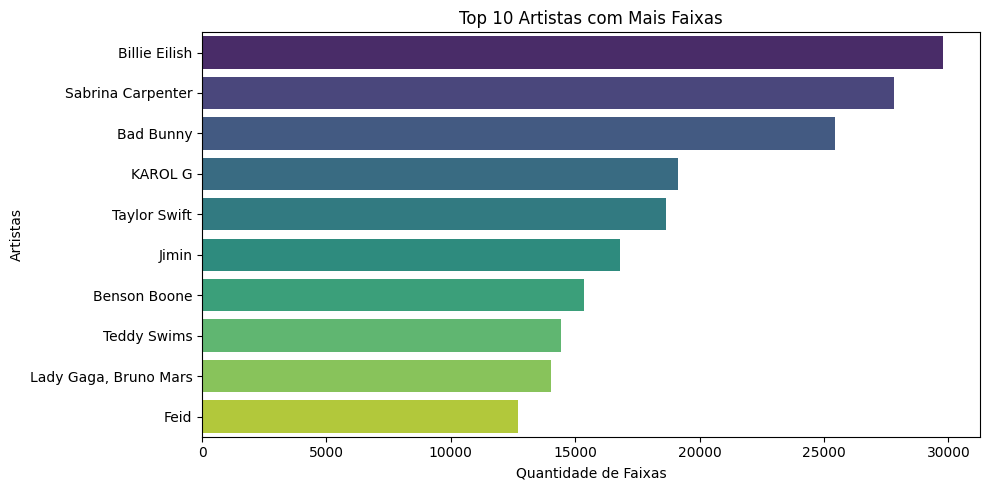

In [3]:
# ---------------------------
# 1. ARTISTS - Top 10 artistas mais frequentes
# ---------------------------
top_artists = df['artists'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")
plt.title("Top 10 Artistas com Mais Faixas")
plt.xlabel("Quantidade de Faixas")
plt.ylabel("Artistas")
plt.tight_layout()
plt.show()

In [ ]:
# ---------------------------
# 2. IS_EXPLICIT - Gráfico de pizza com proporção
# ---------------------------
explicit_counts = df['is_explicit'].value_counts()
labels = ['Não Explícitas', 'Explícitas']
colors = ['#66b3ff','#ff6666']

plt.figure(figsize=(6,6))
plt.pie(explicit_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Proporção de Músicas Explícitas")
plt.tight_layout()
plt.show()


In [ ]:
# ---------------------------
# Histograma do tamanho dos nomes das músicas
# ---------------------------

# Garantir que todos os nomes sejam tratados como string
df['name_length'] = df['name'].apply(lambda x: len(str(x)))

# Calcular a média
avg_name_length = df['name_length'].mean()

# Histograma
plt.figure(figsize=(10, 5))
sns.histplot(df['name_length'], bins=30, color="mediumslateblue")

# Linha da média
avg_name_length = df['name_length'].mean()
plt.axvline(avg_name_length, color='red', linestyle='--', linewidth=2, label=f'Média: {avg_name_length:.2f}')

# Ajuste do eixo X
plt.xlim(0, 60)  # Limita visualização
plt.xticks(np.arange(0, 61, 5))  # De 0 a 60, de 5 em 5

# Títulos e legendas
plt.title("Distribuição do Tamanho dos Nomes das Músicas")
plt.xlabel("Número de Caracteres")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# ---------------------------
# 4. ALBUM_NAME - Top 10 álbuns mais populares
# ---------------------------
top_albums = df['album_name'].value_counts().head(10)
print(df['album_name'].value_counts(dropna=True).head(10))

plt.figure(figsize=(10,5))
sns.barplot(x=top_albums.values, y=top_albums.index, palette="magma")
plt.title("Top 10 Álbuns Mais Populares")
plt.xlabel("Quantidade de Faixas")
plt.ylabel("Álbum")
plt.tight_layout()
plt.show()

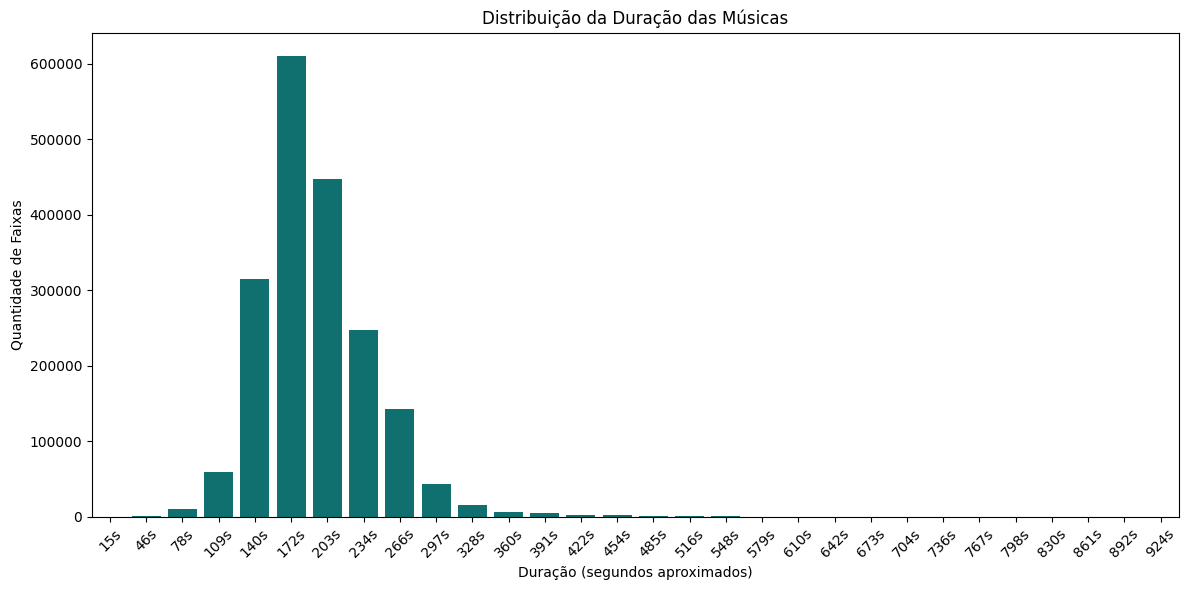

In [3]:
# duration_ms
# Define os bins
bins = 30
df['duration_bin'] = pd.cut(df['duration_ms'], bins=bins)

# Conta as faixas por intervalo
duration_counts = df['duration_bin'].value_counts().sort_index()

# Rótulos simples: mostra o meio do intervalo em segundos
labels = [f"{int((interval.left + interval.right)//2 // 1000)}s" for interval in duration_counts.index]

# Plota o gráfico
plt.figure(figsize=(12,6))
sns.barplot(x=labels, y=duration_counts.values, color='teal')
plt.xticks(rotation=45)
plt.title("Distribuição da Duração das Músicas")
plt.xlabel("Duração (segundos aproximados)")
plt.ylabel("Quantidade de Faixas")
plt.tight_layout()
plt.show()

(-0.000978, 0.0333]: 4693 faixas
(0.0333, 0.0666]: 395 faixas
(0.0666, 0.0998]: 5214 faixas
(0.0998, 0.133]: 10824 faixas
(0.133, 0.166]: 3332 faixas
(0.166, 0.2]: 8313 faixas
(0.2, 0.233]: 7218 faixas
(0.233, 0.266]: 13049 faixas
(0.266, 0.299]: 10915 faixas
(0.299, 0.333]: 21194 faixas
(0.333, 0.366]: 20397 faixas
(0.366, 0.399]: 38086 faixas
(0.399, 0.432]: 61422 faixas
(0.432, 0.466]: 52055 faixas
(0.466, 0.499]: 77041 faixas
(0.499, 0.532]: 98075 faixas
(0.532, 0.566]: 102721 faixas
(0.566, 0.599]: 127108 faixas
(0.599, 0.632]: 138536 faixas
(0.632, 0.665]: 137323 faixas
(0.665, 0.699]: 156355 faixas
(0.699, 0.732]: 179030 faixas
(0.732, 0.765]: 162925 faixas
(0.765, 0.798]: 127154 faixas
(0.798, 0.832]: 110539 faixas
(0.832, 0.865]: 82222 faixas
(0.865, 0.898]: 68687 faixas
(0.898, 0.931]: 47488 faixas
(0.931, 0.965]: 35156 faixas
(0.965, 0.998]: 8390 faixas


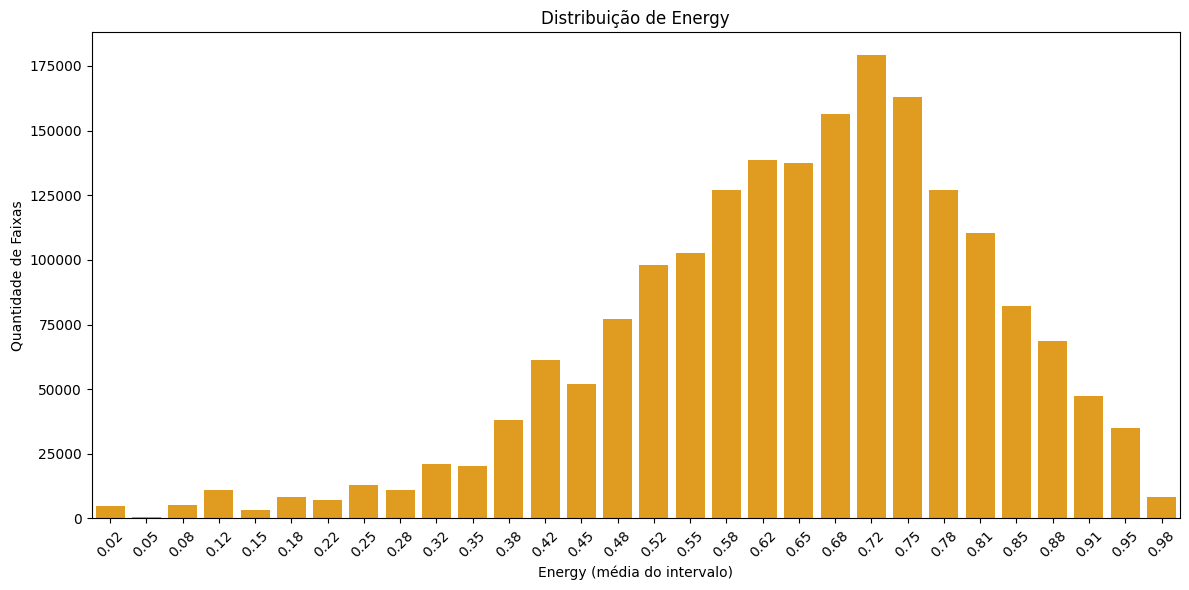

In [4]:
# energy
# Define os bins

df['energy_bin'] = pd.cut(df['energy'], bins=30)

# Conta as faixas por intervalo
energy_counts = df['energy_bin'].value_counts().sort_index()

# Imprime no console
for interval, count in energy_counts.items():
    print(f"{interval}: {count} faixas")

# Rótulos simples: valor médio do intervalo com 2 casas decimais
labels = [f"{(interval.left + interval.right)/2:.2f}" for interval in energy_counts.index]

# Plota o gráfico
plt.figure(figsize=(12,6))
sns.barplot(x=labels, y=energy_counts.values, color='orange')
plt.xticks(rotation=45)
plt.title("Distribuição de Energy")
plt.xlabel("Energy (média do intervalo)")
plt.ylabel("Quantidade de Faixas")
plt.tight_layout()
plt.show()

(-54.399, -52.422]: 269 faixas
(-52.422, -50.503]: 0 faixas
(-50.503, -48.584]: 0 faixas
(-48.584, -46.664]: 0 faixas
(-46.664, -44.745]: 2235 faixas
(-44.745, -42.826]: 0 faixas
(-42.826, -40.907]: 0 faixas
(-40.907, -38.988]: 0 faixas
(-38.988, -37.069]: 10 faixas
(-37.069, -35.15]: 0 faixas
(-35.15, -33.231]: 3115 faixas
(-33.231, -31.311]: 4646 faixas
(-31.311, -29.392]: 2606 faixas
(-29.392, -27.473]: 151 faixas
(-27.473, -25.554]: 3859 faixas
(-25.554, -23.635]: 186 faixas
(-23.635, -21.716]: 421 faixas
(-21.716, -19.797]: 2642 faixas
(-19.797, -17.877]: 3591 faixas
(-17.877, -15.958]: 5229 faixas
(-15.958, -14.039]: 14120 faixas
(-14.039, -12.12]: 36250 faixas
(-12.12, -10.201]: 92171 faixas
(-10.201, -8.282]: 235819 faixas
(-8.282, -6.363]: 446295 faixas
(-6.363, -4.444]: 677216 faixas
(-4.444, -2.524]: 341818 faixas
(-2.524, -0.605]: 38808 faixas
(-0.605, 1.314]: 3867 faixas
(1.314, 3.233]: 533 faixas


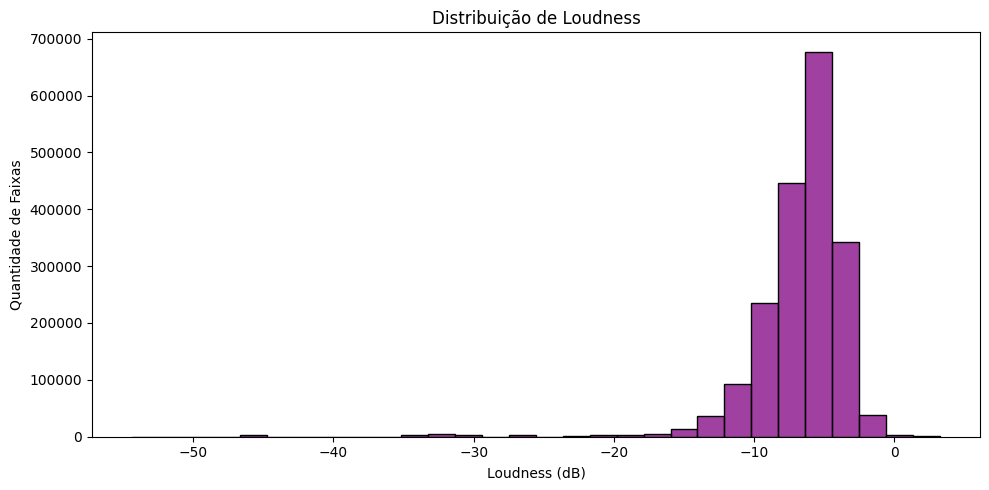

In [5]:
# loudness (Intervalos de loudness)
# Define os intervalos (bins) e cria uma nova coluna com a faixa de loudness
bins = 30  # você pode ajustar esse valor
df['loudness_bin'] = pd.cut(df['loudness'], bins=bins)

# Conta quantas faixas caem em cada faixa de loudness
loudness_counts = df['loudness_bin'].value_counts().sort_index()

# Imprime no console
for interval, count in loudness_counts.items():
    print(f"{interval}: {count} faixas")

# Plota o histograma
plt.figure(figsize=(10,5))
sns.histplot(df['loudness'], bins=bins, color='purple')
plt.title("Distribuição de Loudness")
plt.xlabel("Loudness (dB)")
plt.ylabel("Quantidade de Faixas")
plt.tight_layout()
plt.show()

(-0.236, 7.87]: 1 faixas
(7.87, 15.739]: 0 faixas
(15.739, 23.609]: 0 faixas
(23.609, 31.479]: 0 faixas
(31.479, 39.348]: 2 faixas
(39.348, 47.218]: 276 faixas
(47.218, 55.087]: 2402 faixas
(55.087, 62.957]: 1061 faixas
(62.957, 70.827]: 14330 faixas
(70.827, 78.696]: 48208 faixas
(78.696, 86.566]: 75103 faixas
(86.566, 94.436]: 141641 faixas
(94.436, 102.305]: 269230 faixas
(102.305, 110.175]: 204115 faixas
(110.175, 118.044]: 170443 faixas
(118.044, 125.914]: 200907 faixas
(125.914, 133.784]: 188948 faixas
(133.784, 141.653]: 138972 faixas
(141.653, 149.523]: 120285 faixas
(149.523, 157.393]: 83089 faixas
(157.393, 165.262]: 90362 faixas
(165.262, 173.132]: 67238 faixas
(173.132, 181.002]: 57798 faixas
(181.002, 188.871]: 15435 faixas
(188.871, 196.741]: 12057 faixas
(196.741, 204.61]: 11450 faixas
(204.61, 212.48]: 1675 faixas
(212.48, 220.35]: 438 faixas
(220.35, 228.219]: 2 faixas
(228.219, 236.089]: 389 faixas


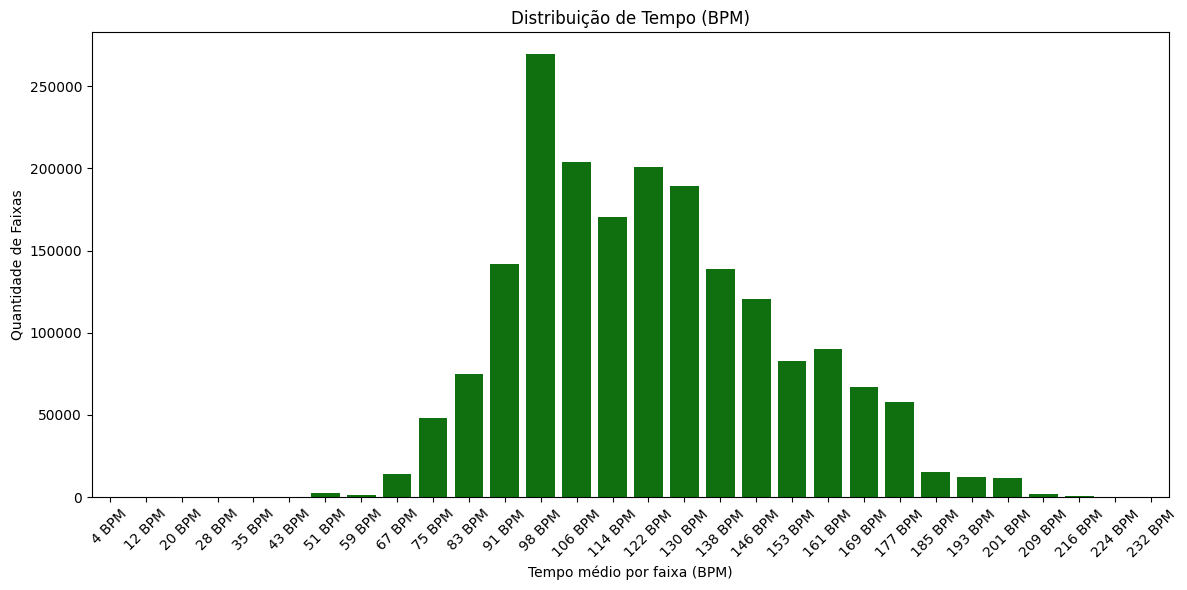

In [6]:
# tempo
# Define os bins
bins = 30
df['tempo_bin'] = pd.cut(df['tempo'], bins=bins)

# Conta as faixas por intervalo
tempo_counts = df['tempo_bin'].value_counts().sort_index()

# Imprime no console
for interval, count in tempo_counts.items():
    print(f"{interval}: {count} faixas")

# Rótulos simples: valor médio do intervalo (arredondado)
labels = [f"{(interval.left + interval.right)/2:.0f} BPM" for interval in tempo_counts.index]

# Plota o gráfico
plt.figure(figsize=(12,6))
sns.barplot(x=labels, y=tempo_counts.values, color='green')
plt.xticks(rotation=45)
plt.title("Distribuição de Tempo (BPM)")
plt.xlabel("Tempo médio por faixa (BPM)")
plt.ylabel("Quantidade de Faixas")
plt.tight_layout()
plt.show()

# 10 Análises Multirate

# 5 Métodos de visualizar os dados